# Importing the Libraries

In [130]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data from json file

In [131]:
df_1 = pd.read_json('A.json')
df_2 = pd.read_json('B.json')
df_3 = pd.read_json('C.json')

# 1. Data preprocessing

# Checking the data

In [132]:
df_3.head(10)

,1,2,3,4,5,6,7,8,9,10,...,20983,20984,20985,20986,20987,20988,20989,20990,20991,20992
d_voltage,"[2104, 2104]","[4163, 3981, 3963, 3951, 3943, 3936, 3929, 392...","[2061, 2061]","[3159, 3104, 3104]","[4169, 4087, 4065, 4052, 4042, 4034, 4027, 402...","[4062, 3973, 3973]","[3095, 3083, 3083]","[1945, 1945]","[0, 0]","[4126, 3947, 3933, 3924, 3917, 3911, 3905, 390...",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
d_time,"[21-05-2024 16:28:48, 21-05-2024 16:28:51]","[21-05-2024 16:28:48, 21-05-2024 16:29:17, 21-...","[21-05-2024 16:28:48, 21-05-2024 16:28:51]","[21-05-2024 16:28:48, 21-05-2024 16:29:17, 21-...","[21-05-2024 16:28:48, 21-05-2024 16:29:17, 21-...","[21-05-2024 16:28:48, 21-05-2024 16:29:17, 21-...","[21-05-2024 16:28:48, 21-05-2024 16:29:17, 21-...","[21-05-2024 16:28:48, 21-05-2024 16:28:51]","[21-05-2024 16:28:48, 21-05-2024 16:28:51]","[21-05-2024 16:28:48, 21-05-2024 16:29:17, 21-...",...,"[24-05-2024 04:26:16, 24-05-2024 04:26:26]","[24-05-2024 04:26:16, 24-05-2024 04:26:26]","[24-05-2024 04:26:16, 24-05-2024 04:26:26]","[24-05-2024 04:26:16, 24-05-2024 04:26:26]","[24-05-2024 04:26:16, 24-05-2024 04:26:26]","[24-05-2024 04:26:16, 24-05-2024 04:26:26]","[24-05-2024 04:26:16, 24-05-2024 04:26:26]","[24-05-2024 04:26:16, 24-05-2024 04:26:26]","[24-05-2024 04:26:16, 24-05-2024 04:26:26]","[24-05-2024 04:26:16, 24-05-2024 04:26:26]"
d_current,"[-2550, 0]","[-2550, -2548, -2548, -2548, -2548, -2548, -25...","[-2550, 0]","[-2550, -25, -25]","[-2550, -2548, -2548, -2548, -2548, -2549, -25...","[-2550, -34, -35]","[-2550, -24, -25]","[-2550, 0]","[-2550, 0]","[-2550, -2548, -2549, -2548, -2549, -2549, -25...",...,"[-2500, 0]","[-2500, 0]","[-2500, -2]","[-2500, -27]","[-2500, -1]","[-2500, 0]","[-2500, 0]","[-2500, -2]","[-2500, -26]","[-2500, 0]"


# Transpose the data to make 3 columns to handle the data

In [133]:
df_1 = df_1.transpose()
df_2 = df_2.transpose()
df_3 = df_3.transpose()

In [134]:
df_3.head(10)

,d_voltage,d_time,d_current
1,"[2104, 2104]","[21-05-2024 16:28:48, 21-05-2024 16:28:51]","[-2550, 0]"
2,"[4163, 3981, 3963, 3951, 3943, 3936, 3929, 392...","[21-05-2024 16:28:48, 21-05-2024 16:29:17, 21-...","[-2550, -2548, -2548, -2548, -2548, -2548, -25..."
3,"[2061, 2061]","[21-05-2024 16:28:48, 21-05-2024 16:28:51]","[-2550, 0]"
4,"[3159, 3104, 3104]","[21-05-2024 16:28:48, 21-05-2024 16:29:17, 21-...","[-2550, -25, -25]"
5,"[4169, 4087, 4065, 4052, 4042, 4034, 4027, 402...","[21-05-2024 16:28:48, 21-05-2024 16:29:17, 21-...","[-2550, -2548, -2548, -2548, -2548, -2549, -25..."
6,"[4062, 3973, 3973]","[21-05-2024 16:28:48, 21-05-2024 16:29:17, 21-...","[-2550, -34, -35]"
7,"[3095, 3083, 3083]","[21-05-2024 16:28:48, 21-05-2024 16:29:17, 21-...","[-2550, -24, -25]"
8,"[1945, 1945]","[21-05-2024 16:28:48, 21-05-2024 16:28:51]","[-2550, 0]"
9,"[0, 0]","[21-05-2024 16:28:48, 21-05-2024 16:28:51]","[-2550, 0]"
10,"[4126, 3947, 3933, 3924, 3917, 3911, 3905, 390...","[21-05-2024 16:28:48, 21-05-2024 16:29:17, 21-...","[-2550, -2548, -2549, -2548, -2549, -2549, -25..."


# Differentiating the Batteries

In [135]:
df_1['Battery'] = 'A'
df_2['Battery'] = 'B'
df_3['Battery'] = 'C'

# Joining all batteries data in one dataframe

In [136]:
df = pd.concat([df_1, df_2, df_3])

In [137]:
df.reset_index(inplace=True)

# To remove the values where no fluctuation in voltage

In [138]:
df = df[df['d_voltage'].apply(lambda x: x != [0,0])].reset_index(drop=True)

dropping the extra index column

In [139]:
df.drop('index', axis=1, inplace=True)

In [140]:
df.head()

,d_voltage,d_time,d_current,Battery
0,"[3971, 3877, 3854, 3832, 3810, 3790, 3774, 375...","[10-07-2024 17:05:25, 10-07-2024 17:05:51, 10-...","[-2500, -2500, -2499, -2500, -2499, -2500, -25...",A
1,"[2838, 2749]","[10-07-2024 17:05:25, 10-07-2024 17:05:28]","[-2500, -34]",A
2,"[2678, 2533]","[10-07-2024 17:05:25, 10-07-2024 17:05:28]","[-2500, 0]",A
3,"[2833, 2750]","[10-07-2024 17:05:25, 10-07-2024 17:05:28]","[-2500, -8]",A
4,"[2824, 2749]","[10-07-2024 17:05:25, 10-07-2024 17:05:28]","[-2500, 0]",A


# Computing the time difference in seconds and added a column

In [141]:
from datetime import datetime
def compute_time_seconds(df, time_column):
    """
    Function to compute time difference in seconds for each row in the specified column.

    Parameters:
    df (pd.DataFrame): DataFrame containing the time data.
    time_column (str): Column name containing timestamp lists.

    Returns:
    pd.Series: Series containing computed time differences in seconds.
    """
    def time_diff(time_list):
        if isinstance(time_list, list) and len(time_list) >= 2:
            start_time = datetime.strptime(time_list[0], '%d-%m-%Y %H:%M:%S')
            end_time = datetime.strptime(time_list[-1], '%d-%m-%Y %H:%M:%S')
            return (end_time - start_time).total_seconds()
        return 0  # Return 0 if insufficient timestamps

    return df[time_column].apply(time_diff)

# Example usage
df['time_seconds'] = compute_time_seconds(df, 'd_time')

In [142]:
df.head(10)

,d_voltage,d_time,d_current,Battery,time_seconds
0,"[3971, 3877, 3854, 3832, 3810, 3790, 3774, 375...","[10-07-2024 17:05:25, 10-07-2024 17:05:51, 10-...","[-2500, -2500, -2499, -2500, -2499, -2500, -25...",A,2850.0
1,"[2838, 2749]","[10-07-2024 17:05:25, 10-07-2024 17:05:28]","[-2500, -34]",A,3.0
2,"[2678, 2533]","[10-07-2024 17:05:25, 10-07-2024 17:05:28]","[-2500, 0]",A,3.0
3,"[2833, 2750]","[10-07-2024 17:05:25, 10-07-2024 17:05:28]","[-2500, -8]",A,3.0
4,"[2824, 2749]","[10-07-2024 17:05:25, 10-07-2024 17:05:28]","[-2500, 0]",A,3.0
5,"[2718, 2749]","[10-07-2024 17:05:25, 10-07-2024 17:05:28]","[-2500, 0]",A,3.0
6,"[4167, 4051, 4030, 4016, 4007, 4001, 3995, 399...","[10-07-2024 17:05:25, 10-07-2024 17:05:51, 10-...","[-2500, -2501, -2501, -2500, -2501, -2501, -25...",A,6131.0
7,"[4136, 3948, 3929, 3920, 3914, 3909, 3903, 389...","[10-07-2024 17:05:25, 10-07-2024 17:05:51, 10-...","[-2500, -2500, -2499, -2501, -2500, -2501, -25...",A,5774.0
8,"[4163, 4020, 3999, 3985, 3975, 3967, 3961, 395...","[10-07-2024 17:05:25, 10-07-2024 17:05:51, 10-...","[-2500, -2501, -2501, -2501, -2501, -2501, -25...",A,6278.0
9,"[2440, 2440]","[10-07-2024 17:05:25, 10-07-2024 17:05:28]","[-2500, 0]",A,3.0


# Computing the voltage difference and added a column

In [143]:
def compute_voltage_diff(df, voltage_column):
    """
    Function to compute voltage difference for each row in the specified column.

    Parameters:
    df (pd.DataFrame): DataFrame containing voltage data.
    voltage_column (str): Column name containing voltage lists.

    Returns:
    pd.Series: Series containing computed voltage differences.
    """
    def voltage_diff(voltage_list):
        if isinstance(voltage_list, list) and len(voltage_list) >= 2:
            return voltage_list[0] - voltage_list[-1]  # First voltage - Last voltage
        return 0  # Return 0 if insufficient data

    return df[voltage_column].apply(voltage_diff)

# Example usage
df['voltage_diff'] = compute_voltage_diff(df, 'd_voltage')

# Computing the current difference and added a column

In [144]:
def compute_current_diff(df, current_column):
    """
    Function to compute the absolute current difference (in Amperes) for each row.

    Parameters:
    df (pd.DataFrame): DataFrame containing current data.
    current_column (str): Column name containing current lists.

    Returns:
    pd.Series: Series containing computed current differences in Amperes.
    """
    def current_diff(current_list):
        if isinstance(current_list, list) and len(current_list) >= 2:
            return abs((current_list[0] - current_list[-1]) / 1000)  # Convert to Amperes
        return 0  # Return 0 if insufficient data

    return df[current_column].apply(current_diff)

# Example usage
df['current_diff'] = compute_current_diff(df, 'd_current')

# Scaling the Data

In [145]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["voltage_diff", "current_diff", "time_seconds"]] = scaler.fit_transform(df[["voltage_diff", "current_diff", "time_seconds"]])

**Removing the original columns have lists we will now not work with the so I'll have to remove**

In [146]:
df.drop(['d_voltage', 'd_current', 'd_time'], axis=1, inplace=True)

In [147]:
df.head()

,Battery,time_seconds,voltage_diff,current_diff
0,A,0.395833,0.624672,0.000000
1,A,0.000417,0.489439,0.657600
2,A,0.000417,0.496438,0.666667
3,A,0.000417,0.488689,0.664533
4,A,0.000417,0.487689,0.666667


# Stats of the data

In [148]:
df.describe()

,time_seconds,voltage_diff,current_diff
count,73911.000000,73911.000000,73911.000000
mean,0.594286,0.602217,0.177607
std,0.416875,0.078049,0.288171
min,0.000000,0.000000,0.000000
25%,0.005833,0.517185,0.000800
50%,0.875833,0.648919,0.009067
75%,0.913333,0.650919,0.653333
max,1.000000,1.000000,1.000000


# Box plot to detect the outliers

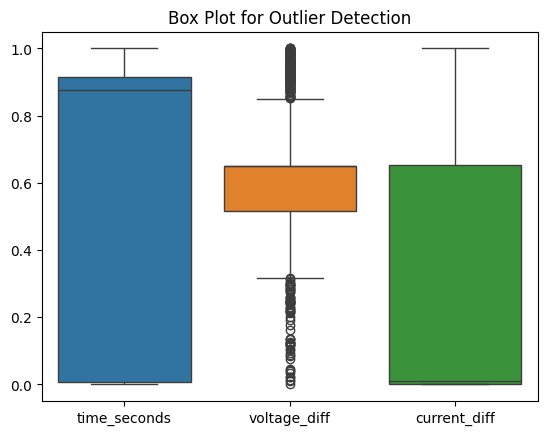

In [149]:
sns.boxplot(data=df[['time_seconds', 'voltage_diff', 'current_diff']])
plt.title("Box Plot for Outlier Detection")
plt.show()

In [150]:
df.isnull().sum()

,0
Battery,0
time_seconds,0
voltage_diff,0
current_diff,0


# Converting categorical labels into numerical values because ml will take input in numarical values not in categorical

In [151]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Battery' column
df['Battery'] = label_encoder.fit_transform(df['Battery'])

# 2. Model selection and training

# Split the data

In [152]:
x = df.iloc[:, 1:].values
y = df.iloc[:,0].values

In [153]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)

# Training the data with Random Forest

In [154]:
from sklearn.ensemble import RandomForestClassifier
R_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
R_classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Training the data with Support Vector Classifier

In [155]:
from sklearn.svm import SVC
S_classifier = SVC(kernel = 'linear', random_state = 0)
S_classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

# Training the data with xgboost

In [156]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost classifier
XGB_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=0)

# Train the model
XGB_classifier.fit(x_train, y_train)

# Predict on test data
y_pred_xgb = XGB_classifier.predict(x_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.6806466887641209
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.54      0.62      4618
           1       0.66      0.81      0.73      6360
           2       0.68      0.64      0.66      3805

    accuracy                           0.68     14783
   macro avg       0.69      0.66      0.67     14783
weighted avg       0.69      0.68      0.68     14783



Checking the predicted values with test values with rf

In [157]:
y_pred_R = R_classifier.predict(x_test)
print(np.concatenate((y_pred_R.reshape(len(y_pred_R),1), y_test.reshape(len(y_test),1)),1))

[[1 2]
 [0 1]
 [0 1]
 ...
 [0 0]
 [0 0]
 [1 0]]


# Confusion matrix and Accuracy of the RF model

In [158]:
from sklearn.metrics import confusion_matrix, accuracy_score
R_cm = confusion_matrix(y_test, y_pred_R)
print(R_cm)
accuracy_score(y_test,y_pred_R)

[[2806 1232  580]
 [1325 4173  862]
 [ 586  895 2324]]


0.6293039301900832

In [159]:
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report, precision_score, recall_score, f1_score
R_cm = confusion_matrix(y_test, y_pred_R)
print(R_cm)
accuracy_rf=accuracy_score(y_test, y_pred_R)
print('accuracy_score : ',accuracy_rf)
p = precision_score(y_test, y_pred_R, average='weighted')
r = recall_score(y_test, y_pred_R, average='weighted')
f1 = f1_score(y_test, y_pred_R, average='weighted')
print(classification_report(y_test, y_pred_R))
print('precision score : ',p)
print('recall_score : ', r)
print('f1_score : ',f1)

[[2806 1232  580]
 [1325 4173  862]
 [ 586  895 2324]]
accuracy_score :  0.6293039301900832
              precision    recall  f1-score   support

           0       0.59      0.61      0.60      4618
           1       0.66      0.66      0.66      6360
           2       0.62      0.61      0.61      3805

    accuracy                           0.63     14783
   macro avg       0.62      0.62      0.62     14783
weighted avg       0.63      0.63      0.63     14783

precision score :  0.6296365879191888
recall_score :  0.6293039301900832
f1_score :  0.6294385708177097


**Checking the predicted values with test values with svc**

In [160]:
y_pred_S = S_classifier.predict(x_test)
print(np.concatenate((y_pred_S.reshape(len(y_pred_S),1), y_test.reshape(len(y_test),1)),1))

[[0 2]
 [0 1]
 [0 1]
 ...
 [0 0]
 [0 0]
 [1 0]]


# Confusion matrix and Accuracy of the SVC model

In [161]:
from sklearn.metrics import confusion_matrix, accuracy_score
S_cm = confusion_matrix(y_test, y_pred_S)
print(S_cm)
accuracy_score(y_test,y_pred_S)

[[3584 1034    0]
 [3377 2983    0]
 [2795 1010    0]]


0.44422647635797874

In [162]:
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report, precision_score, recall_score, f1_score
S_cm = confusion_matrix(y_test, y_pred_S)
print(S_cm)
accuracy_svm=accuracy_score(y_test, y_pred_S)
print('accuracy_score : ',accuracy_svm)
p = precision_score(y_test, y_pred_S, average='weighted')
r = recall_score(y_test, y_pred_S, average='weighted')
f1 = f1_score(y_test, y_pred_S, average='weighted')
print(classification_report(y_test, y_pred_S))
print('precision score : ',p)
print('recall_score : ', r)
print('f1_score : ',f1)

[[3584 1034    0]
 [3377 2983    0]
 [2795 1010    0]]
accuracy_score :  0.44422647635797874
              precision    recall  f1-score   support

           0       0.37      0.78      0.50      4618
           1       0.59      0.47      0.52      6360
           2       0.00      0.00      0.00      3805

    accuracy                           0.44     14783
   macro avg       0.32      0.42      0.34     14783
weighted avg       0.37      0.44      0.38     14783

precision score :  0.3700522129601594
recall_score :  0.44422647635797874
f1_score :  0.38118755740426996


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

# Plotting the heatmap of Confusion matrix for RF model

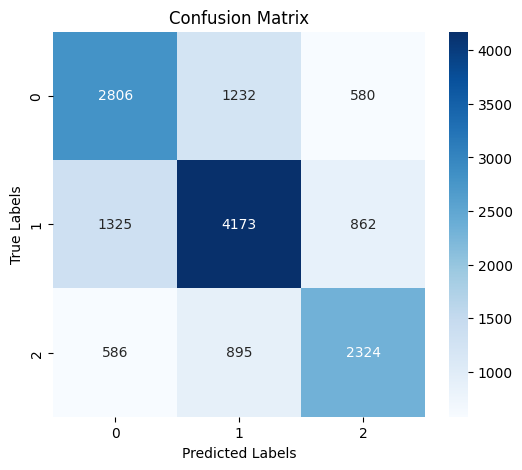

In [163]:
# Compute confusion matrix
R_cm = confusion_matrix(y_test, y_pred_R)

# Plot using Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(R_cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Plotting the heatmap of Confusion matrix for SVC model

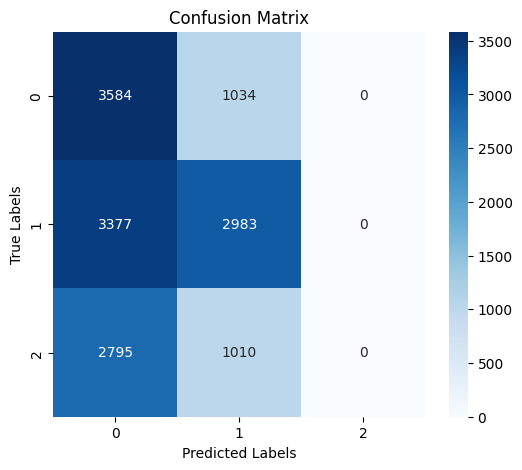

In [164]:
# Compute confusion matrix
S_cm = confusion_matrix(y_test, y_pred_S)

# Plot using Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(S_cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Plotting the heatmap of Confusion matrix for XGB model

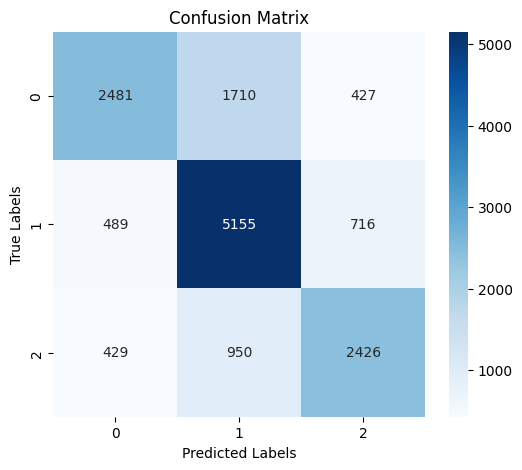

In [165]:
# Compute confusion matrix
xgb_cm = confusion_matrix(y_test, y_pred_xgb)

# Plot using Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [166]:
comparison_table = pd.DataFrame({
    'Model': ['XGB_classifier', 'R_classifier', 'S_classifier'],
    'Accuracy': [accuracy_xgb, accuracy_rf, accuracy_svm]
})
print(comparison_table)


            Model  Accuracy
0  XGB_classifier  0.680647
1    R_classifier  0.629304
2    S_classifier  0.444226


# Summery of the Model
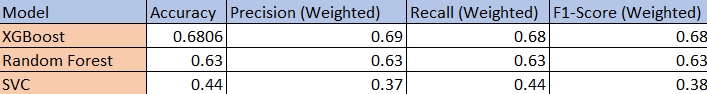


# **Based on the results presented in the table, we can conclude:**

***XGBoost performed the best among the three models:***

1. It has the highest accuracy (0.6806)
2. It also has the highest precision, recall, and F1-score (all 0.68 or 0.69)
**Random Forest performed second-best:**

1. Its accuracy (0.63) is lower than XGBoost but significantly better than SVC
2. It has consistent precision, recall, and F1-score (all 0.63)

**SVC (Support Vector Classifier) performed the poorest:**
1. It has the lowest accuracy (0.44)
2. Its precision, recall, and F1-score are also the lowest among the three models

**XGBoost shows a balanced performance across all classes:**

1. It has good precision and recall for all three classes (0, 1, 2)
2. This indicates it's handling the multi-class problem well

**Random Forest also shows a balanced performance, but slightly lower than XGBoost:**
1. Its precision and recall are consistent across classes, but lower than XGBoost

**SVC struggled with the multi-class problem:**
1. It failed to predict class 2 at all (0.00 precision and recall)
2. It shows high recall but low precision for class 0, indicating potential overprediction